In [1]:
# install dependencies
%pip install -q \
  matplotlib \
  pandas \
  pycaret \
  "pycaret[analysis]" \
  seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# set up the environment for the notebook
import os
os.environ['PYCARET_CUSTOM_LOGGING_LEVEL'] = 'CRITICAL'

import pandas
pandas.set_option('display.max_columns', 128)

TARGET_NAME = 'condition'
IDENTIFIERS = ['datasetId']
DATA = {
  name: None
  for name in ['test', 'train']
}

In [3]:
# prepare the data
from pathlib import Path
from pycaret.datasets import get_data
from zipfile import ZipFile

for data_name in DATA.keys():
  # extract the compressed data files
  if Path(f'../datasets/swell/data/final/{data_name}.csv').exists():
    print(f'Data file "{data_name}" was already extracted')
  else:
    ZipFile(f'../datasets/swell/data/final/{data_name}.zip', 'r').extract(
      f'datasets/swell/data/final/{data_name}.csv', '..'
    )
    print(f'Data file "{data_name}" has been extracted successfully')
  # load the data
  print(f'Loading data file "{data_name}"')
  DATA[data_name] = get_data(dataset=f'../datasets/swell/data/final/{data_name}')

Data file "test" was already extracted
Loading data file "test"


,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,SD2,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,721.901897,727.267280,74.722315,12.361264,12.361069,6.044877,84.121868,4.933333,0.000000,8.743513,105.310967,1.262958,-0.703779,0.000081,-0.000951,0.017605,0.011208,0.011208,1.570800,1.262958,-0.703779,1016.073759,59.818117,615.914573,36.260015,90.239711,66.617057,3.921868,9.760289,1698.605390,9.245599,0.108160,2.097342,1.243696,2,no stress
1,843.538633,844.407930,58.499429,19.298880,19.298795,3.031234,71.478642,21.000000,0.200000,13.650863,81.596693,-0.445806,-0.144911,0.000061,-0.001543,0.022969,0.011970,0.011970,1.918953,-0.445806,-0.144911,765.518473,32.452560,1566.866135,66.424024,98.336849,26.500086,1.123416,1.663151,2358.884694,59.126832,0.016913,2.217275,1.250056,2,time pressure
2,958.523868,966.671125,132.849110,21.342715,21.342653,6.224565,63.874293,24.133333,1.800000,15.096571,187.269500,-0.666523,-0.103725,-0.000055,-0.002000,0.022079,0.009606,0.009606,2.298473,-0.666523,-0.103725,2237.739905,51.696218,2074.868884,47.933575,99.233584,16.024935,0.370208,0.766416,4328.633724,129.477524,0.007723,2.217136,1.144943,2,no stress
3,824.838669,842.485905,117.822094,11.771814,11.771248,10.008830,74.330531,4.733333,0.533333,8.326307,166.417439,-0.698096,-0.145092,0.000130,0.000445,0.014920,0.007051,0.007051,2.116033,-0.698096,-0.145092,2330.980957,81.661325,505.886664,17.722743,96.641348,17.581470,0.615932,3.358652,2854.449091,28.773854,0.034754,2.106863,1.142355,2,no stress
4,756.707933,747.941620,143.968457,13.357748,13.356388,10.777899,82.092049,5.933333,0.666667,9.447545,203.382835,1.134111,0.769517,0.000310,-0.000170,0.019649,0.011689,0.011689,1.681034,1.134111,0.769517,4750.624447,89.465158,524.203971,9.871963,93.707747,35.199054,0.662879,6.292253,5310.027472,14.892559,0.067148,1.912191,1.128098,2,interruption


Data file "train" was already extracted
Loading data file "train"


,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,SD2,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,199.061782,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,114.634458,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,118.939253,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,127.318597,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,87.718281,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,no stress


In [4]:
# drop identifiers from the datasets
for data in DATA.values():
  data.drop(columns=IDENTIFIERS, inplace=True)

In [5]:
# establish an experiment
from pycaret.classification import ClassificationExperiment

exp = ClassificationExperiment()
exp.setup(
  data=DATA['train'],
  test_data=DATA['test'],
  target=TARGET_NAME,
  index=False,
  session_id=123,
)
None

,Description,Value
0,Session id,123
1,Target,condition
2,Target type,Multiclass
3,Target mapping,"interruption: 0, no stress: 1, time pressure: 2"
4,Original data shape,"(410322, 35)"
5,Transformed data shape,"(410322, 35)"
6,Transformed train set shape,"(369289, 35)"
7,Transformed test set shape,"(41033, 35)"
8,Numeric features,34
9,Preprocess,True


In [10]:
# set global plot parameters
import matplotlib.pyplot as plt
import seaborn as sns

# reset old global plot parameters
plt.rcdefaults()

COLORMAP = sns.color_palette()
DPI = 400
OUTLINE_WIDTH = 0.2
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.linewidth'] = OUTLINE_WIDTH
plt.rcParams['figure.dpi'] = DPI
plt.rcParams['font.size'] = DPI // 100
plt.rcParams['xtick.major.width'] = OUTLINE_WIDTH
plt.rcParams['xtick.minor.width'] = OUTLINE_WIDTH
plt.rcParams['ytick.major.width'] = OUTLINE_WIDTH
plt.rcParams['ytick.minor.width'] = OUTLINE_WIDTH

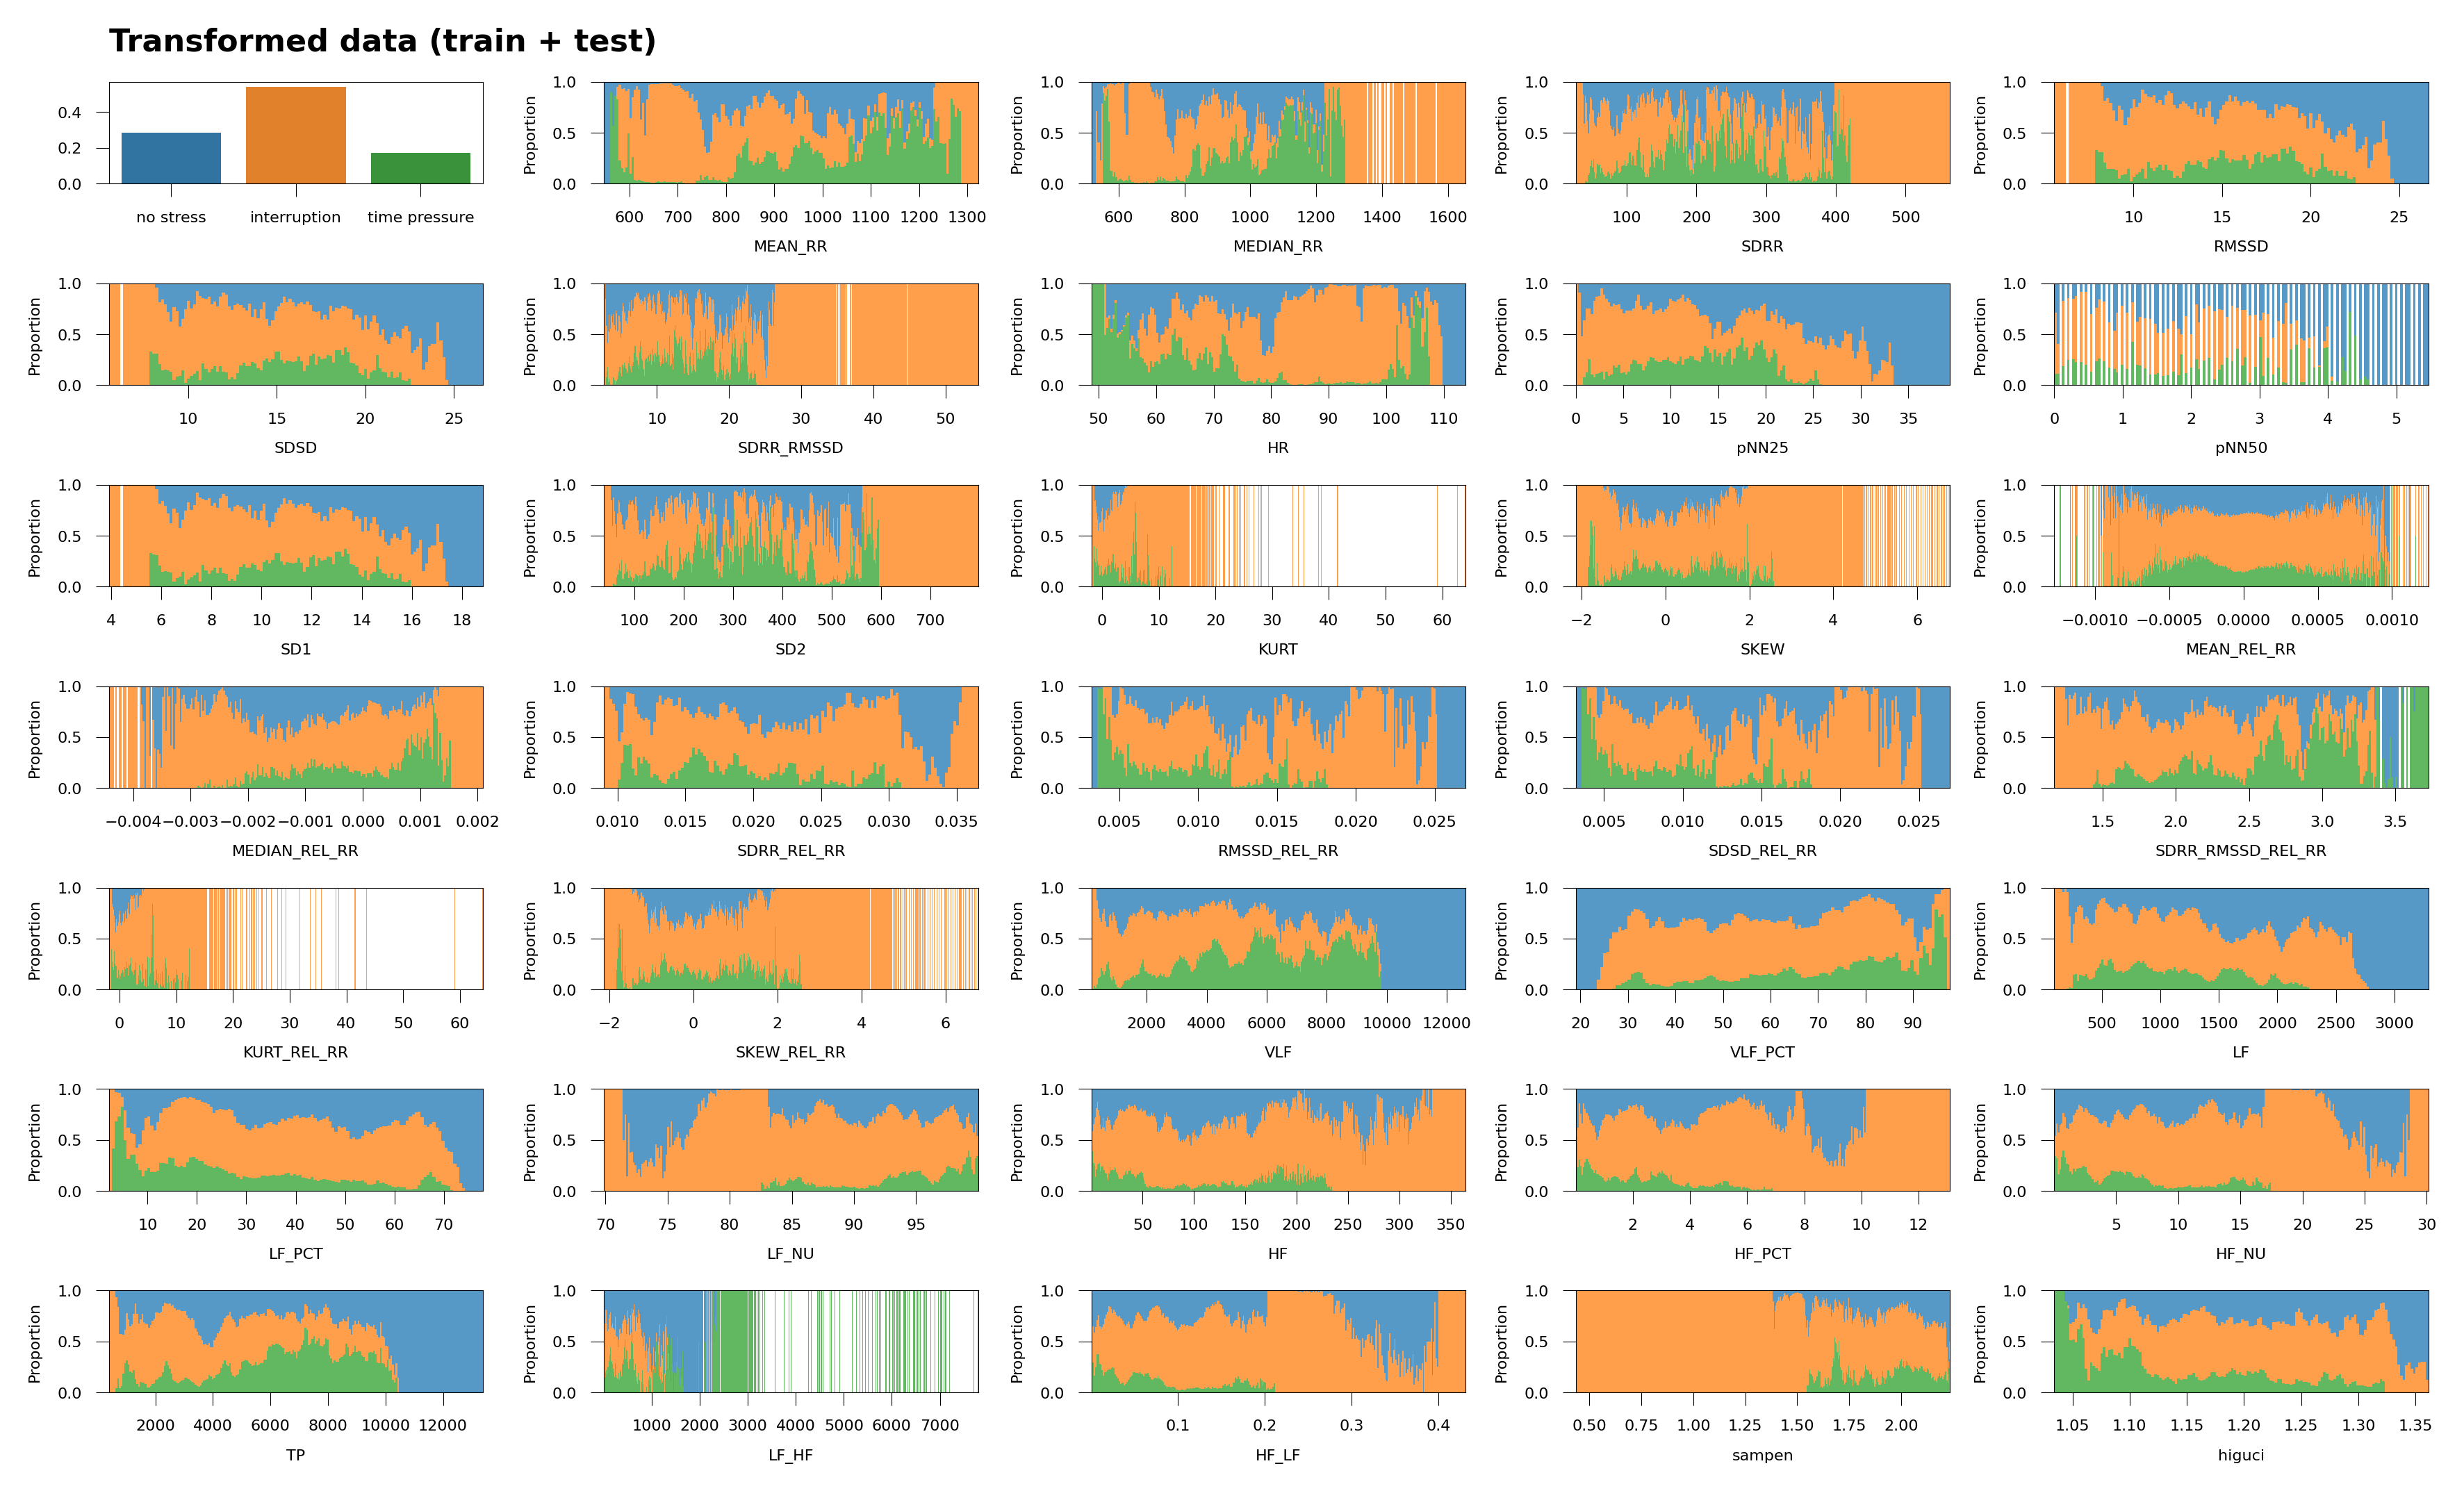

In [35]:
# show the feature distributions of the data
from math import ceil

# adjustable local plot parameters
SUBPLOT_SIZE = (700, 300)
TITLE = 'Transformed data (train + test)'

# setting local plot parameters
plots_per_col = 5
shape = (plots_per_col, ceil(exp.dataset_transformed.shape[1] / plots_per_col))
figsize = tuple(pxs[0] * pxs[1] / DPI for pxs in zip(SUBPLOT_SIZE, shape))
title_params = {
  'label': TITLE,
  'fontdict': {
    'fontsize': plt.rcParams['font.size'] * 2,
    'fontweight': 'bold',
  },
  'loc': 'left',
  'pad': plt.rcParams['font.size'] * 2,
}

# plot grid
axs = plt.subplots(
  nrows=shape[1],
  ncols=shape[0],
  layout='constrained',
  figsize=figsize,
)[1].flat

# plot target distribution
target_dist_data = exp.y_transformed.value_counts(normalize=True)
ax = sns.barplot(
  x=target_dist_data.index,
  y=target_dist_data.values,
  ax=axs[0],
  palette=COLORMAP,
)
ax.set_xticklabels(exp.y.value_counts(normalize=True).index)

# plot data title
axs[0].set_title(**title_params)

# plot features distribution
for x, ax in zip(exp.X_transformed.columns, axs[1:]):
  sns.histplot(
    data=exp.dataset_transformed,
    x=x,
    ax=ax,
    hue=TARGET_NAME,
    legend=False,
    linewidth=0,
    multiple='fill',
    palette=COLORMAP,
    stat='proportion',
  )

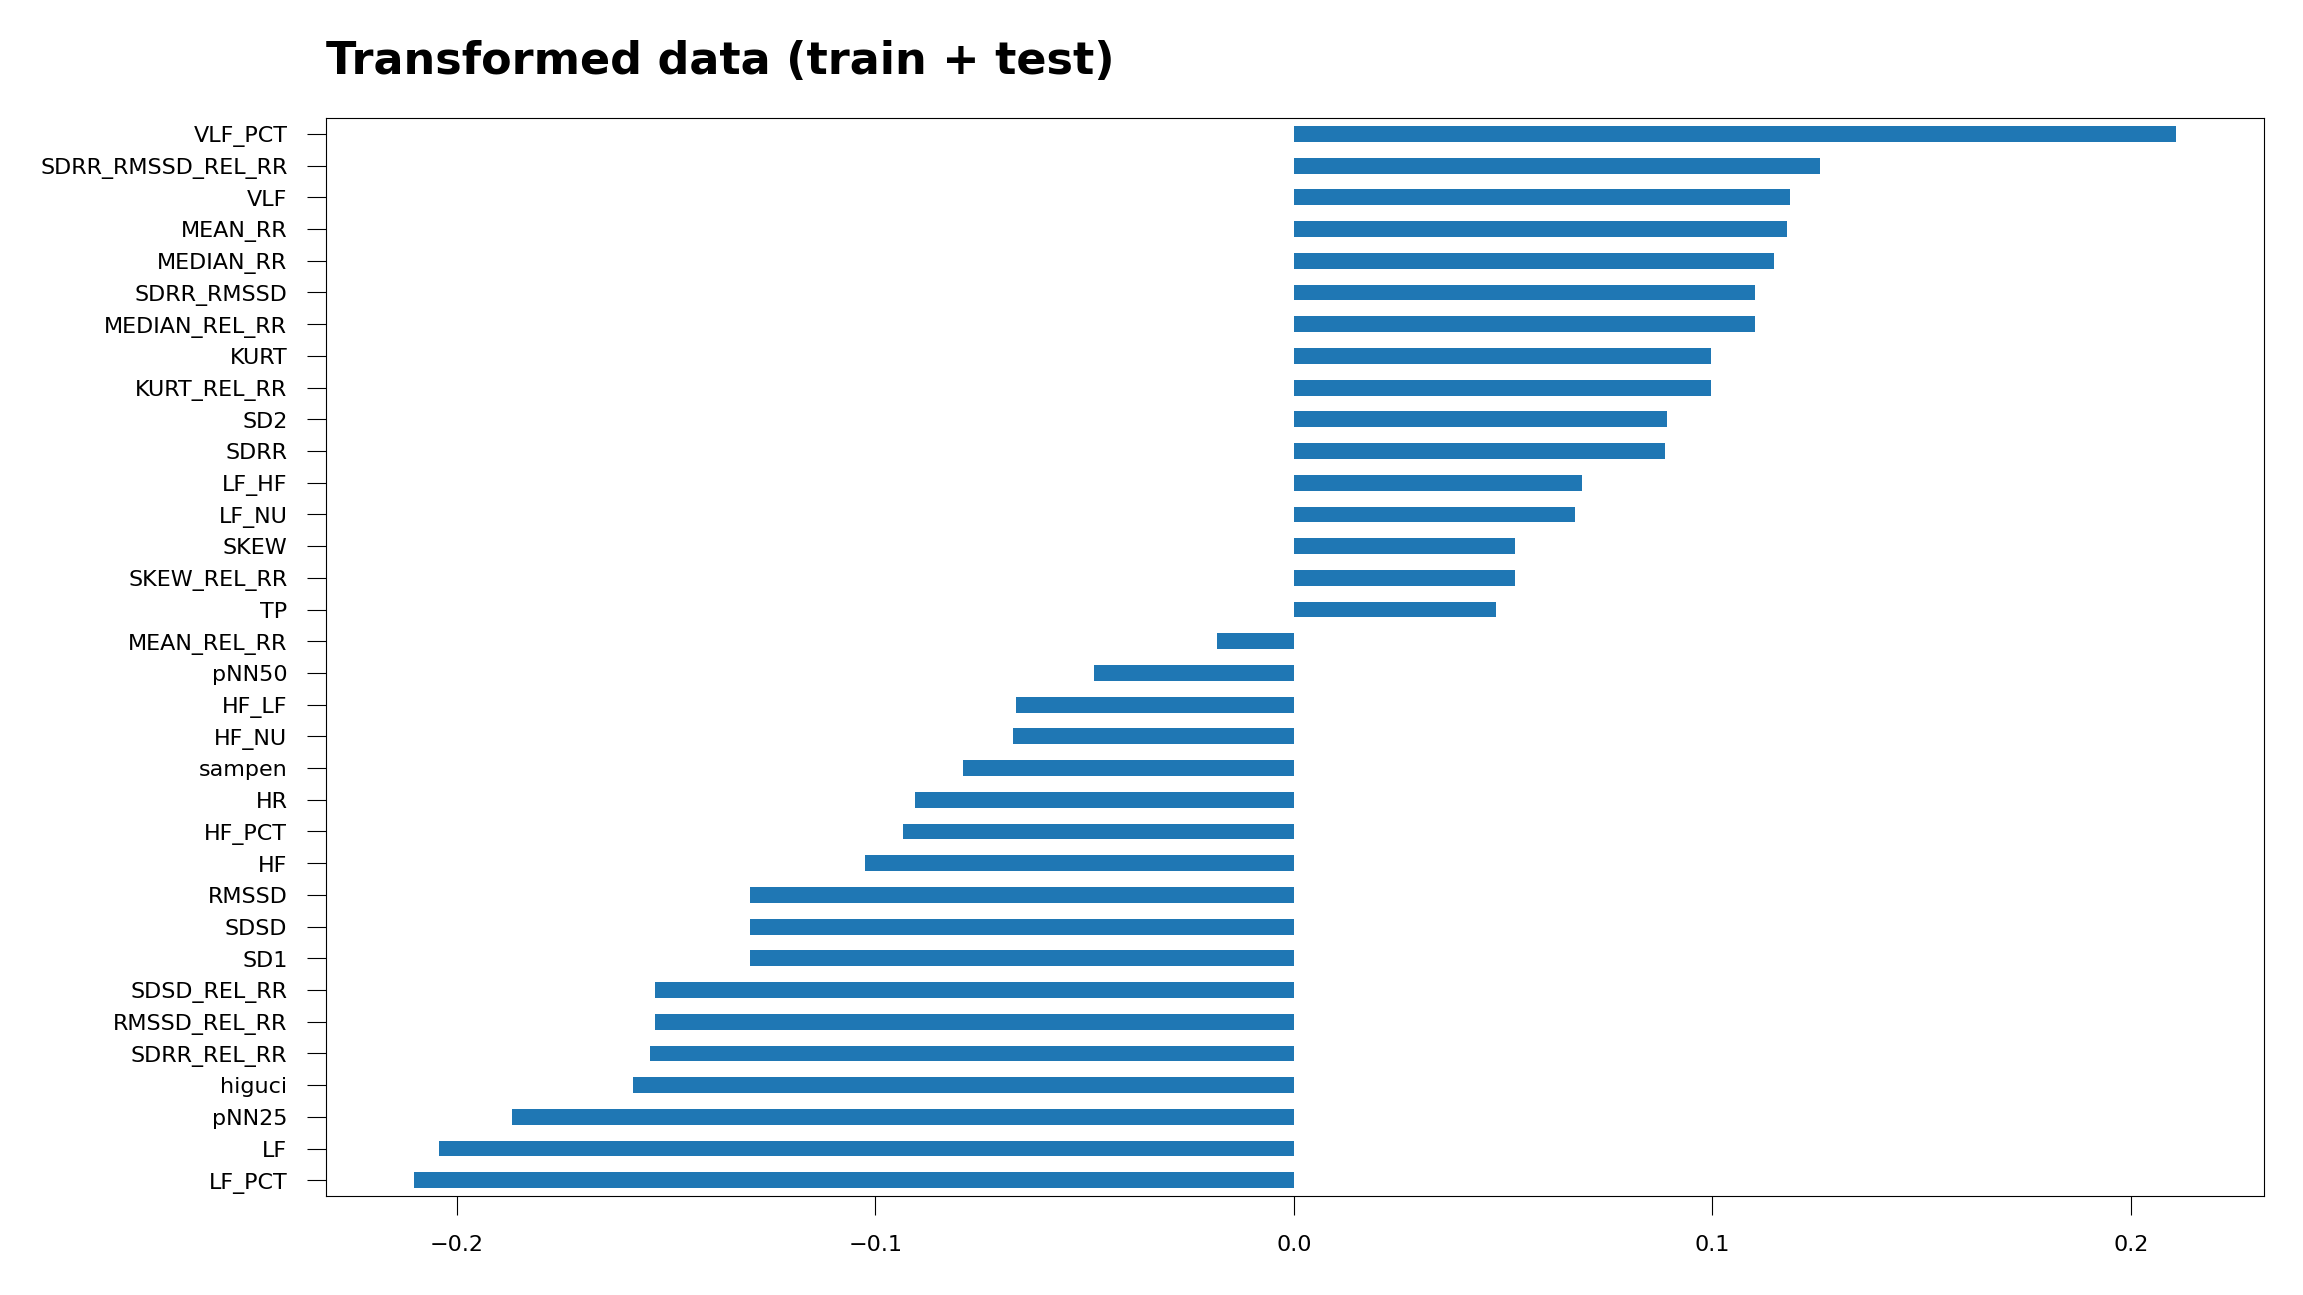

In [29]:
# check correlation between target and features
# adjustable plot parameters
PLOT_SIZE = (2500, 1400)

# setting plot parameters
figsize = tuple(px / DPI for px in PLOT_SIZE)

# plot correlation to target
target_corr_data = (exp.dataset_transformed
  .corr()[TARGET_NAME]
  .drop(TARGET_NAME)
  .sort_values())
ax = target_corr_data.plot.barh(figsize=figsize)
ax.set_title(**title_params)
None

In [8]:
# compare models with AUROC
exp.compare_models(
  exclude=[ # excludes slow and unsuitable models
    'ada',
    'catboost',
    'gbc',
    'knn',
    'lightgbm',
    'lr',
    'ridge',
    'rf',
    'svm',
  ],
  sort='auc',
)
None

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,3.5070
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.4760
dt,Decision Tree Classifier,0.9994,0.9995,0.9994,0.9994,0.9994,0.9990,0.9990,1.9700
lda,Linear Discriminant Analysis,0.6385,0.7500,0.6385,0.6264,0.6122,0.3342,0.3531,0.4200
qda,Quadratic Discriminant Analysis,0.5724,0.7393,0.5724,0.5319,0.5253,0.2942,0.3305,0.3090
nb,Naive Bayes,0.5209,0.6914,0.5209,0.5455,0.5268,0.2322,0.2356,0.3760
dummy,Dummy Classifier,0.5418,0.5000,0.5418,0.2936,0.3808,0.0000,0.0000,0.1610


In [9]:
# assign the best model id manually
BEST_MODEL_ID = 'xgboost'

best_model = exp.create_model(BEST_MODEL_ID)
best_model

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

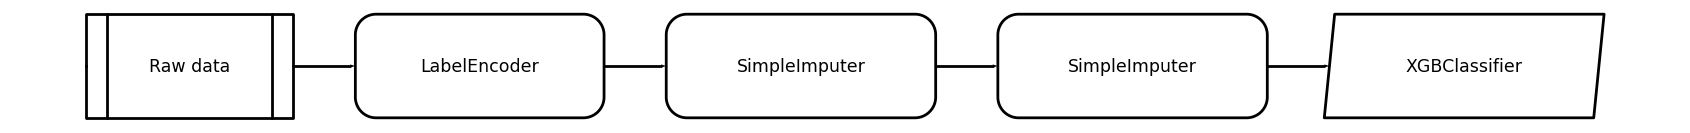

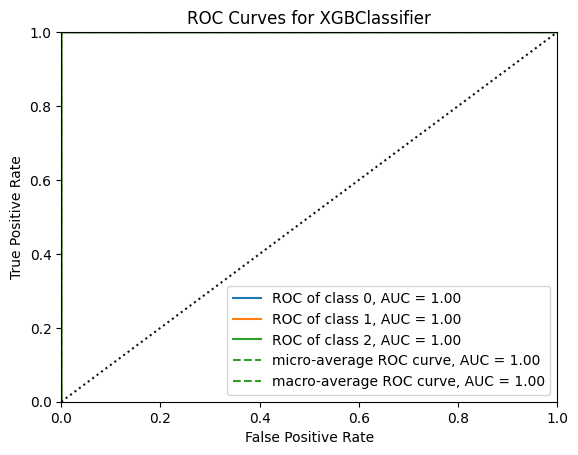

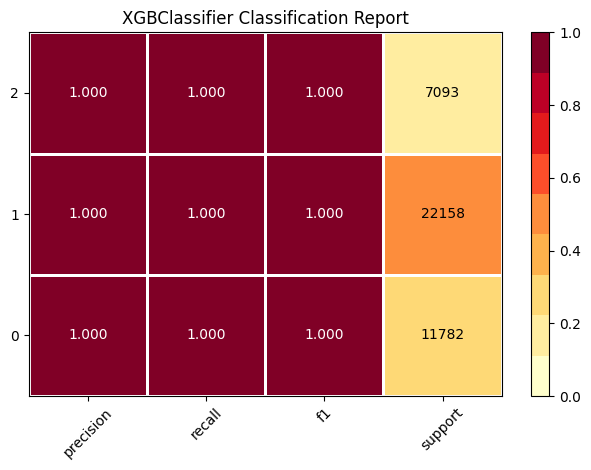

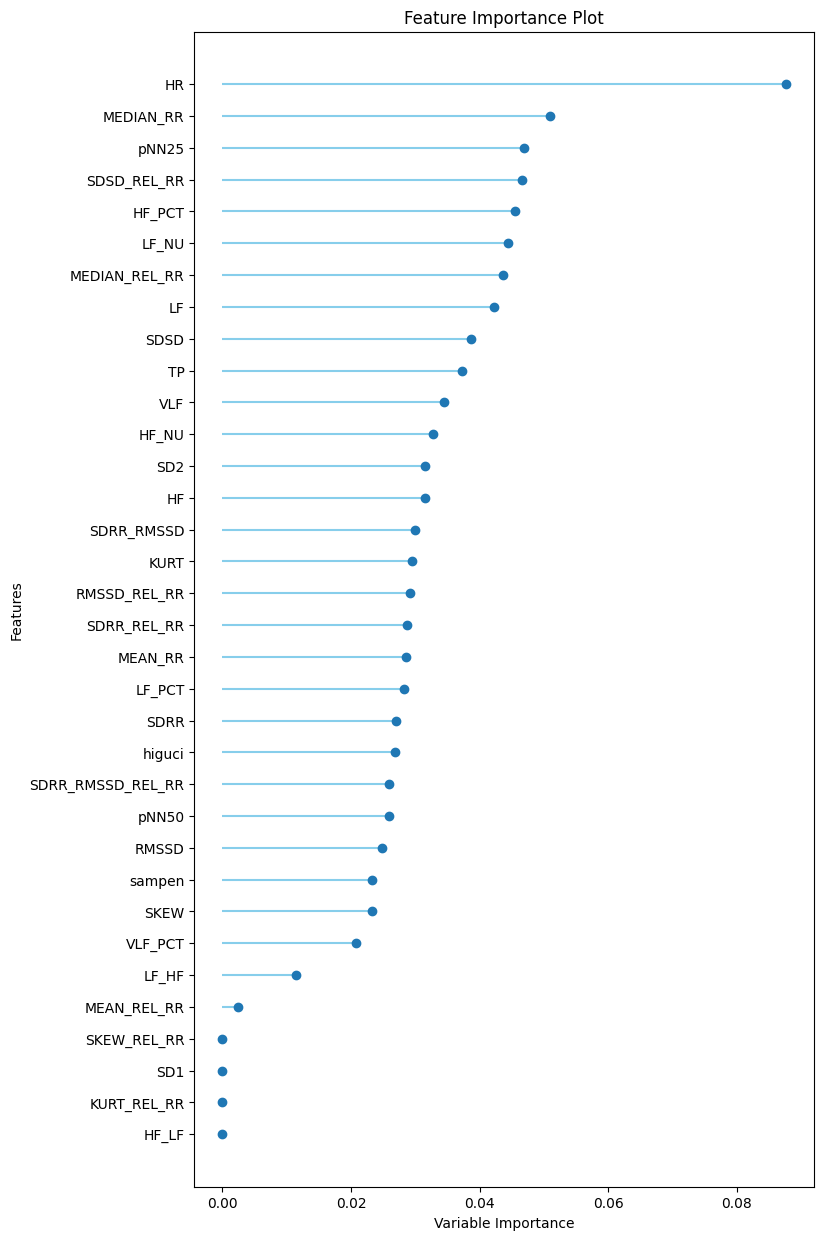

,Parameters
objective,multi:softprob
base_score,None
booster,gbtree
callbacks,None
colsample_bylevel,None
colsample_bynode,None
colsample_bytree,None
device,cpu
early_stopping_rounds,None
enable_categorical,False


In [10]:
# profile the best model
plot_types = [
  'pipeline',
  'auc',
  'class_report',
  'feature_all',
  'parameter',
]
for plot_type in plot_types:
  exp.plot_model(
    estimator=best_model,
    plot=plot_type,
  )

In [11]:
# show hold-out predictions
predictions = exp.predict_model(
  estimator=best_model,
  raw_score=True,
)
predictions[filter(
  lambda name: name.startswith('prediction_'),
  predictions.columns,
)].sample(
  n=15,
  random_state=123,
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,prediction_label,prediction_score_interruption,prediction_score_no stress,prediction_score_time pressure
380118,interruption,0.9997,0.0003,0.0000
369536,no stress,0.0001,0.9998,0.0001
399645,no stress,0.0001,0.9999,0.0000
375878,no stress,0.0004,0.9994,0.0002
385576,no stress,0.0002,0.9998,0.0000
402199,time pressure,0.0002,0.0000,0.9998
391050,interruption,0.9994,0.0006,0.0000
397656,no stress,0.0004,0.9990,0.0006
398352,no stress,0.0005,0.9975,0.0019
398153,no stress,0.0012,0.9984,0.0005


In [12]:
# save the experiment and model
from pathlib import Path

Path('../models/swell-best').mkdir(
  parents=True,
  exist_ok=True,
)

exp.save_experiment(
  path_or_file='../models/swell-best/experiment.pkl',
)
exp.save_model(
  model=best_model,
  model_name='../models/swell-best/model',
  model_only=False,
)
None

Transformation Pipeline and Model Successfully Saved
